In [1]:
!pip install --upgrade diffusers[torch]
!pip install transformers

In [1]:
# create image generation pipeline
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.35.1",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

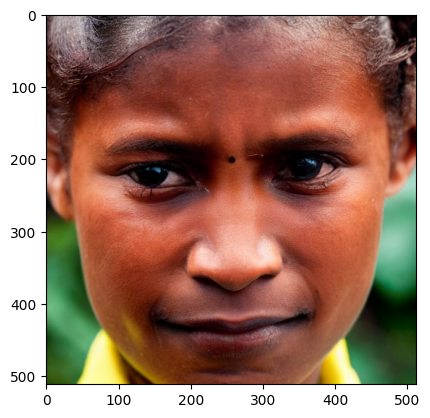

In [4]:
# generate images

import matplotlib.pyplot as plt
prompt = "a human face"
negative_prompt = "3d, cartoon, anime, sketches, (worst quality:2), (low quality:2), (normal quality:2), lowres, normal quality, ((monochrome)), " + \
                  "((grayscale)) Low Quality, Worst Quality, plastic, fake, disfigured, deformed, blurry, bad anatomy, blurred, watermark, grainy, signature"

img = pipeline(prompt, negative_prompt=negative_prompt).images[0]

plt.imshow(img)
plt.show()

happy a black ['male', 'female']


  0%|          | 0/50 [00:00<?, ?it/s]

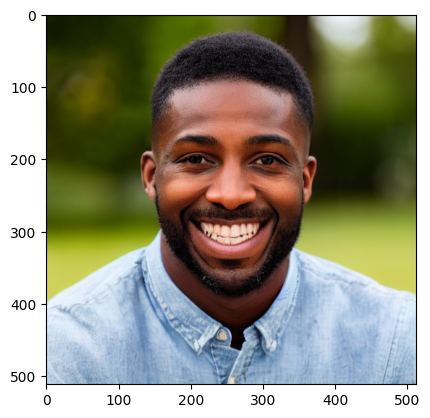

sad an indian ['male', 'female']


  0%|          | 0/50 [00:00<?, ?it/s]

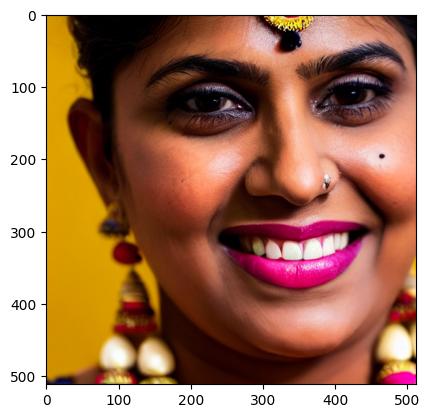

surprised an indian ['male', 'female']


  0%|          | 0/50 [00:00<?, ?it/s]

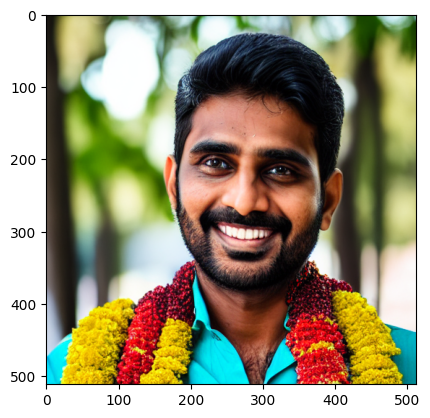

angry an asian ['male', 'female']


  0%|          | 0/50 [00:00<?, ?it/s]

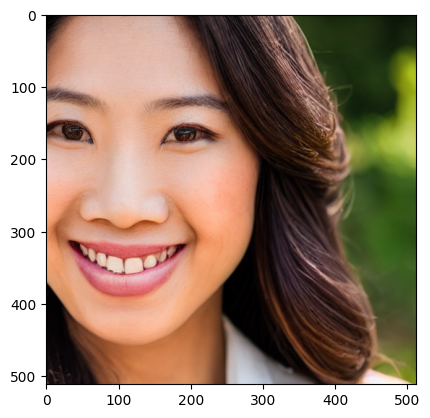

happy an asian ['male', 'female']


  0%|          | 0/50 [00:00<?, ?it/s]

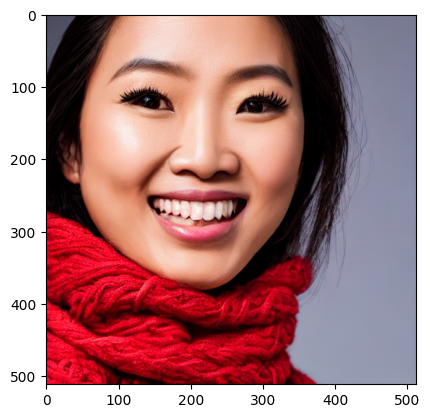

sad an asian ['male', 'female']


  0%|          | 0/50 [00:00<?, ?it/s]

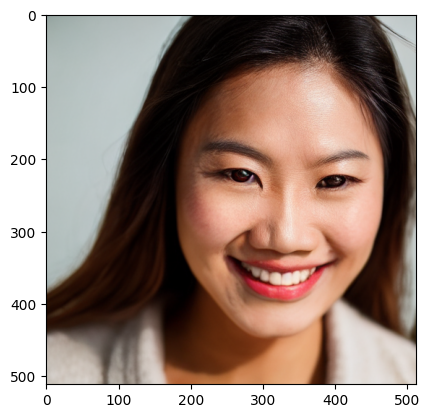

surprised a middle eastern ['male', 'female']


  0%|          | 0/50 [00:00<?, ?it/s]

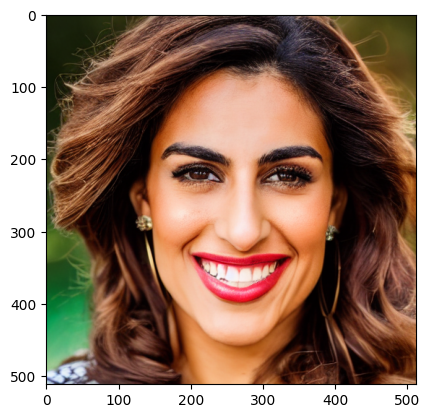

angry an indian ['male', 'female']


  0%|          | 0/50 [00:00<?, ?it/s]

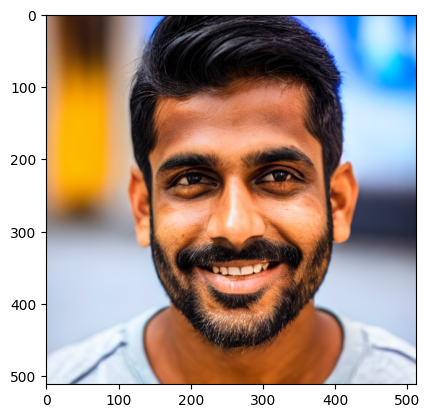

In [4]:
# generate images
import os
import random
import matplotlib.pyplot as plt

os.makedirs("content/faces/happy", exist_ok=True)
os.makedirs("content/faces/sad", exist_ok=True)
os.makedirs("content/faces/angry", exist_ok=True)
os.makedirs("content/faces/surprised", exist_ok=True)

ethnicities = ["a latino", "a white", "a black", "a middle eastern", "an indian", "an asian"]

genders = ["male", "female"]

emotions_prompts = {"happy": "smiling",
                    "sad": "frowning, sad face expression, crying",
                    "surprised":"surprised, opened mouth, raised eyebrows",
                    "angry": "angry"}

for j in range(250):

  for emotion in emotions_prompts.keys():

    emotions_prompt = emotions_prompts[emotion]

    ethnicity = random.choice(ethnicities)
    gender = random.choice(genders)

    print(emotion, ethnicity, genders)

    prompt = "Medium-shot portrait of {} {}, smiling, front view, looking at the camera, color photography, ".format(ethnicity, gender, emotions_prompt) + \
        "photorealistic, hyperrealistic,realistic, incredibly detailed, crisp focus, digital art, depth of field, 50mm, 8k"

    negative_prompt = "3d, cartoon, anime, sketches, (worst quality:2), (low quality:2), (normal quality:2), lowres, normal quality, ((monochrome)), " + \
                "((grayscale)) Low Quality, Worst Quality, plastic, fake, disfigured, deformed, blurry, bad anatomy, blurred, watermark, grainy, signature"

    img = pipeline(prompt, negative_prompt=negative_prompt).images[0]

    img.save("/content/faces/{}/{}.png".format(emotion, str(j).zfill(4)))

    #plt.imshow(img)
    #plt.show()

In [ ]:
!zip -r faces.zip /content/faces